In [1]:
#karas install
!pip install keras

In [2]:
# tf install
!pip install tensorflow

                                              0.0/272.8 MB ? eta -:--:--
                                             1.2/272.8 MB 24.8 MB/s eta 0:00:11
                                             5.6/272.8 MB 59.2 MB/s eta 0:00:05
     -                                       9.4/272.8 MB 66.9 MB/s eta 0:00:04
     -                                      12.8/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     14.7/272.8 MB 81.8 MB/s eta 0:00:04
     --                                     15.7/272.8 MB 26.2 MB/s eta 0:00:10
     --                                     17.

In [4]:
# MNIST data load
from keras.datasets import mnist
X, y = mnist.load_data()[0]
X.shape, y.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [15]:
import pickle as pkl
data = mnist.load_data()
with open(r'./data/mnist.pkl', 'wb') as f:
    pkl.dump(data, f)

In [31]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.166666, random_state=1473032201)
X_tmp.shape, X_test.shape, y_tmp.shape, y_test.shape

((50000, 28, 28), (10000, 28, 28), (50000,), (10000,))

In [5]:
(X_tmp, y_tmp),(X_test, y_test) = mnist.load_data()

In [6]:
X_tmp.shape, y_tmp.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(-0.5, 27.5, 27.5, -0.5)

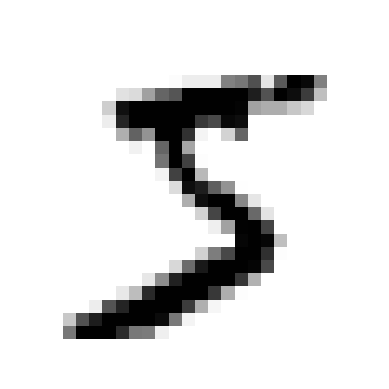

In [41]:
# 데이터 시각화
import matplotlib.pyplot as plt
plt.imshow(X_tmp[0].reshape(28,28), cmap='binary')
plt.axis('off')

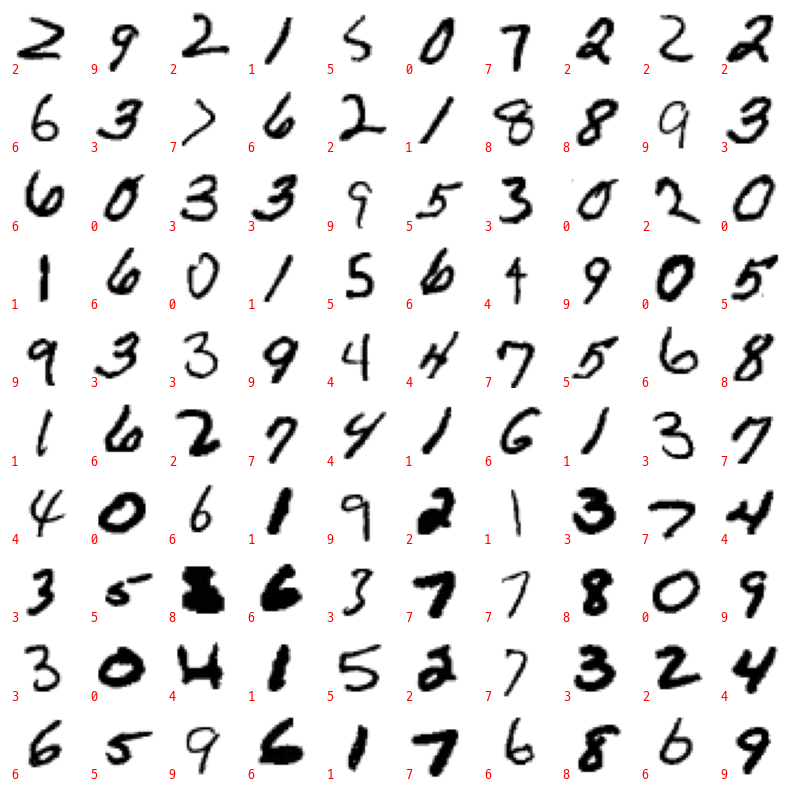

In [63]:
# 데이터 10*10개 시각화
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(10,10))
start_n = 5900
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(X_tmp[start_n+i*10+j].reshape(28,28), cmap='binary')
        axes[i,j].axis('off')
        # 정답값 출력
        axes[i,j].text(0, 27, y_tmp[start_n+i*10+j], color='r', fontsize=10)

In [52]:
import numpy as np
np.unique(y_tmp, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [8]:
# 28*28 -> 784
X_tmp = X_tmp.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_tmp.shape, X_test.shape

((60000, 784), (10000, 784))

In [9]:
# 0~255 -> 0~1 : 정규화
X_tmp = X_tmp.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [56]:
# stratified k-fold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1473032201)
skf.get_n_splits(X_tmp, y_tmp)

5

In [61]:
# tree clf 모델 생성
# accuracy 스코어 출력
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
scores = []
max_d_range = range(10, 21)
for depth in max_d_range:
    depth_scores = []
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1473032201)
    for train_index, test_index in skf.split(X_tmp, y_tmp):
        X_train, X_valid = X_tmp[train_index], X_tmp[test_index]
        y_train, y_valid = y_tmp[train_index], y_tmp[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_valid)
        score = accuracy_score(y_valid, y_pred)
        depth_scores.append(score)
    mean_score = np.mean(depth_scores)
    scores.append((mean_score, depth))

In [62]:
scores.sort(key=lambda x: x[0], reverse=True)
scores

[(0.86995, 18),
 (0.8695999999999999, 14),
 (0.8692333333333334, 15),
 (0.8692333333333332, 19),
 (0.8692, 20),
 (0.8688666666666667, 16),
 (0.8684666666666667, 13),
 (0.8682000000000001, 17),
 (0.8674666666666667, 12),
 (0.8607333333333334, 11),
 (0.8523833333333334, 10)]

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_depth=18, random_state=1473032201)
clf.fit(X_tmp, y_tmp)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8789

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 923,    0,    7,    5,    4,    7,   11,    5,   10,    8],
       [   0, 1091,    7,    3,    3,    7,   11,    3,    8,    2],
       [   9,   10,  885,   29,   14,   14,   15,   26,   23,    7],
       [   9,    4,   28,  864,    8,   47,    4,    8,   23,   15],
       [   8,    5,   10,    7,  861,    5,   16,    8,   21,   41],
       [  15,    5,    4,   43,    6,  750,   20,    5,   24,   20],
       [  19,    7,   14,    6,   21,   25,  834,    1,   25,    6],
       [   4,   12,   21,   17,    9,    4,    2,  933,   10,   16],
       [  12,    9,   29,   37,   26,   22,   16,   11,  782,   30],
       [  17,    3,   11,   21,   37,   11,    5,   19,   19,  866]],
      dtype=int64)

<Axes: >

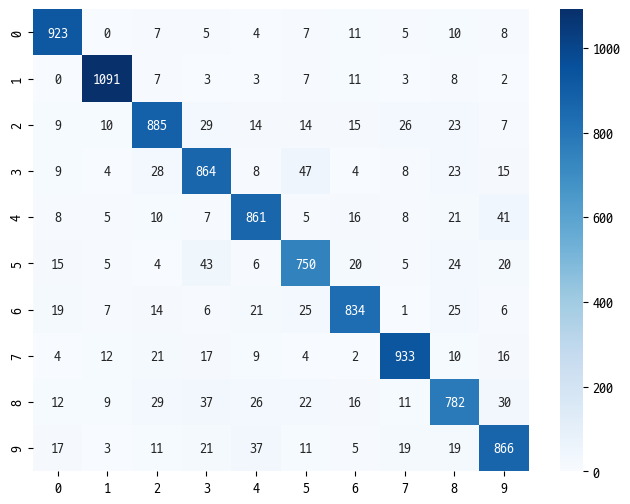

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [93]:
def confusion_matrix_heatmap(y_true, y_pred, logscale=False, cmap='Blues', figsize=(8,6),showlog=True):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    cm = confusion_matrix(y_true, y_pred)
    fmt = 'd'
    title = '혼동 행렬'
    labels = True
    if logscale:
        fmt = ''
        cm = np.log1p(cm)
        cm_x_len  = cm.shape[0]
        cm_y_len  = cm.shape[1]
        if showlog:
            title = '로그 스케일 - ' + title
            counts = [f'{value:d}' for value in confusion_matrix(y_true, y_pred).flatten()]
            f_counts = [f'{value:.2f}' for value in cm.flatten()]
            labels = [f'{c}\n{f}' for c, f in zip(counts, f_counts)]
            labels = np.asarray(labels).reshape(cm_x_len, cm_y_len)
        else:
            labels = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt=fmt, cmap=cmap)
    plt.title(title)
    plt.xlabel('예측값')
    plt.ylabel('실제값')
    # 구석에 '*색상은 로그 스케일 적용' 표시
    if logscale and not showlog:
        plt.text(0.8, -0.08, '*색상은 로그 스케일 적용', ha='left', va='center', transform=plt.gca().transAxes)

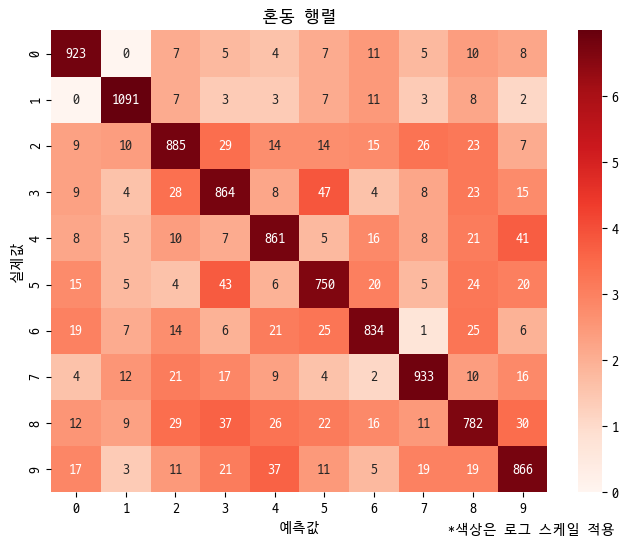

In [94]:
confusion_matrix_heatmap(y_test, y_pred, logscale=True, cmap='Reds', showlog=False)

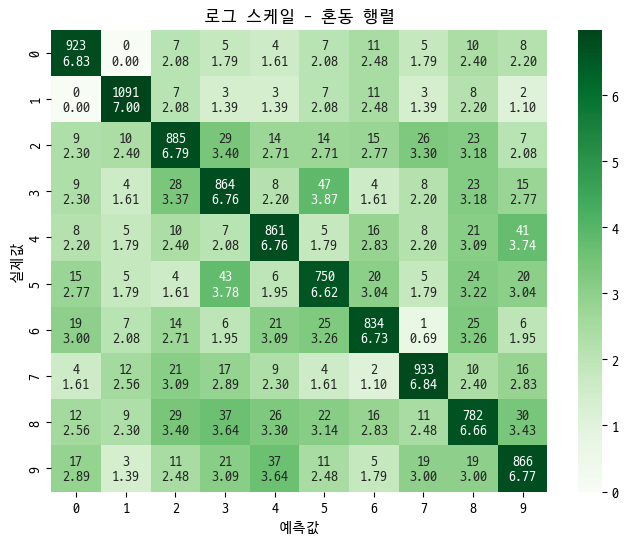

In [97]:
confusion_matrix_heatmap(y_test, y_pred, logscale=True, cmap='Greens', showlog=True)

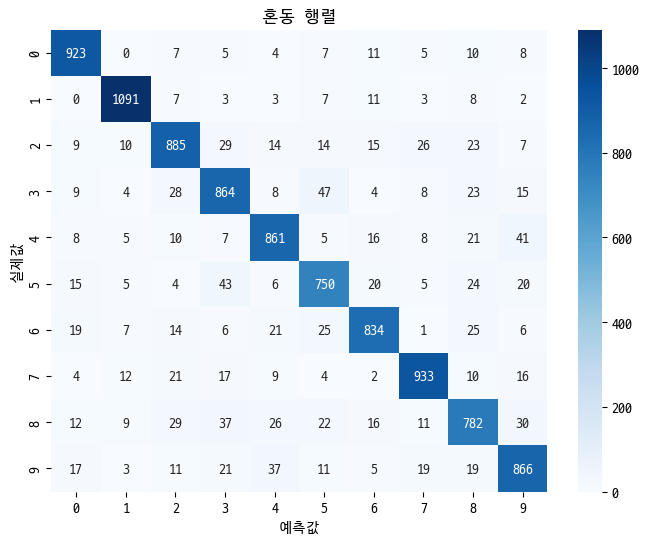

In [58]:
confusion_matrix_heatmap(y_test, y_pred)

In [115]:
# digit.png 파일을 읽어서 28*28 np.array로 변환
from PIL import Image
import numpy as np
img = Image.open(r'./data/digit.png')
img = img.convert('L')
img = img.resize((28,28))
img = np.array(img)

# img를 0~1 사이의 값으로 정규화
img = img.astype('float32') / 255

# 추론
clf.predict(img.reshape(1, 784))

array([0], dtype=uint8)

array([7], dtype=uint8)

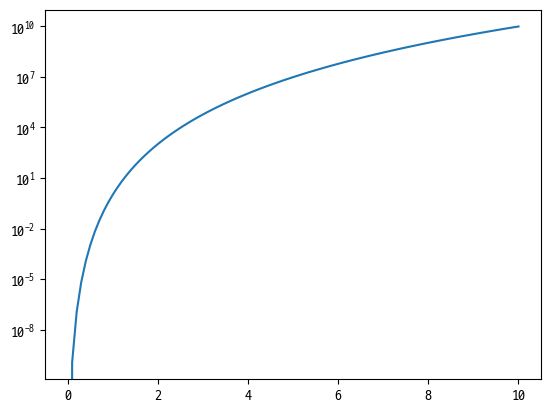

In [9]:
# y = x^2 을 y축 로그스케일로 그리기
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
y = x**10
plt.plot(x, y)
plt.yscale('log')

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    
    return (np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2])) / max_iter

def plot_mandelbrot(xmin, xmax, ymin, ymax, width=10, height=10, max_iter=256, cmap='inferno'):
    dpi = 80
    img_width = dpi * width
    img_height = dpi * height

    img = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height, max_iter)
    
    plt.figure(figsize=(width, height), dpi=dpi)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=cmap, extent=[xmin, xmax, ymin, ymax])
    plt.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import matplotlib as mpl

h = np.linspace(0, 1, 256)
s = 0.7 * np.ones_like(h)
v = np.ones_like(h)
hsv = np.column_stack((h, s, v))
hex_colors = []
for x in hsv:
    r, g, b = colorsys.hsv_to_rgb(*x)
    r = int(r * 255)
    g = int(g * 255)
    b = int(b * 255)
    hex_colors.append("#{:02x}{:02x}{:02x}".format(r, g, b))

cmap = mpl.colors.ListedColormap(hex_colors)
cmap2 = mpl.colors.ListedColormap(hex_colors[::-1])

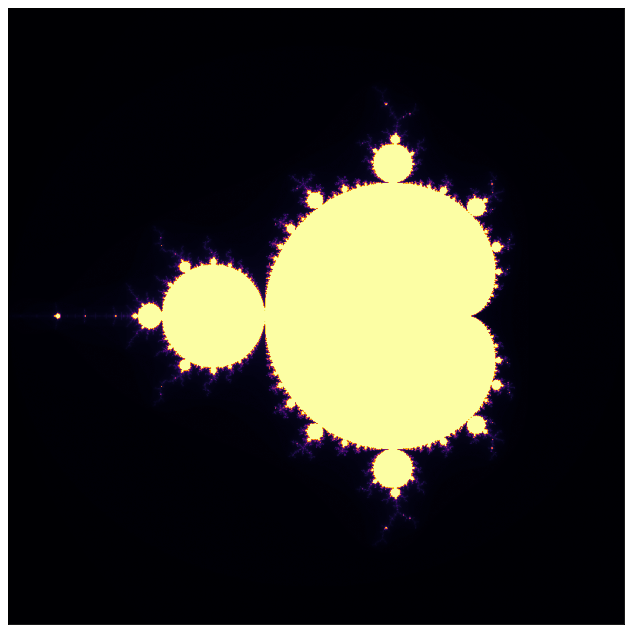

In [15]:
# Example: plot a Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
plot_mandelbrot(xmin, xmax, ymin, ymax, cmap='inferno')

In [ ]:
# potin = (xmin, xmax, ymin, ymax)
# potin_ = (xmin_, xmax_, ymin_, ymax_)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]), r1, r2)

def animate_mandelbrot_transition(point, point_, width=800, height=800, max_iter=256, steps=30):
    fig, ax = plt.subplots()
    images = []
    
    for t in np.linspace(0, 1, steps):
        xmin = point[0] * (1-t) + point_[0] * t
        xmax = point[1] * (1-t) + point_[1] * t
        ymin = point[2] * (1-t) + point_[2] * t
        ymax = point[3] * (1-t) + point_[3] * t
        
        m_set, r1, r2 = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

        im = ax.imshow(m_set, extent=(r1[0], r1[-1], r2[0], r2[-1]))
        images.append([im])

    ani = FuncAnimation(fig, lambda x: x, frames=steps, blit=True)
    plt.show()

RuntimeError: The animation function must return a sequence of Artist objects.

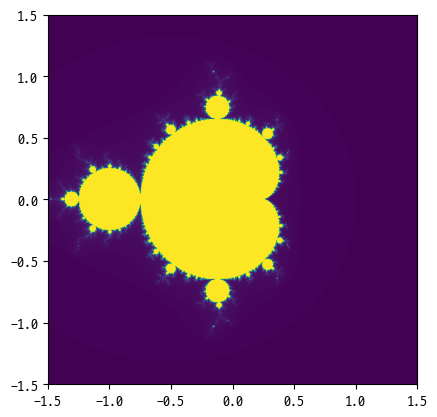

In [17]:
point = (-2, 2, -2, 2)
point_ = (-1.5, 1.5, -1.5, 1.5)
animate_mandelbrot_transition(point, point_);

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z * z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]), r1, r2)

def update(frame, point, point_, width, height, max_iter, step_size):
    t = frame * step_size
    
    xmin = point[0] * (1 - t) + point_[0] * t
    xmax = point[1] * (1 - t) + point_[1] * t
    ymin = point[2] * (1 - t) + point_[2] * t
    ymax = point[3] * (1 - t) + point_[3] * t
    
    m_set, r1, r2 = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    im.set_array(m_set)
    im.set_extent((r1[0], r1[-1], r2[0], r2[-1]))

    return im,


def animate_mandelbrot_transition(point, point_, width=800, height=800, max_iter=256, steps=30):
    global im
    fig, ax = plt.subplots()

    step_size = 1 / steps
    
    init_set, r1, r2 = mandelbrot_set(point[0], point[1], point[2], point[3], width, height, max_iter)
    im = ax.imshow(init_set, extent=(r1[0], r1[-1], r2[0], r2[-1]))

    ani = FuncAnimation(fig, update, fargs=(point, point_, width, height, max_iter, step_size), frames=steps, blit=True, repeat=False)
    plt.show()

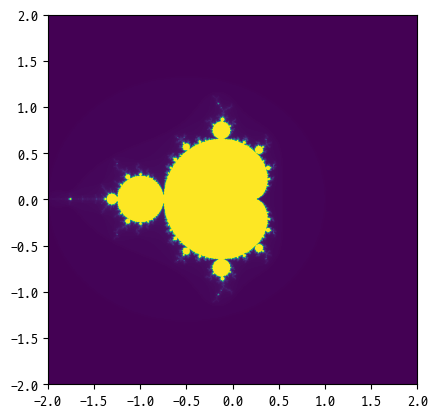

In [21]:
point = (-2, 2, -2, 2)
point_ = (-1.5, 1.5, -1.5, 1.5)
animate_mandelbrot_transition(point, point_, steps=100);

In [23]:
!pip install tk pillow

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from tkinter import *
from PIL import Image, ImageTk

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z * z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]), r1, r2)

def update(frame, point, point_, width, height, max_iter, step_size, im, ax):
    t = frame * step_size
    
    xmin = point[0] * (1 - t) + point_[0] * t
    xmax = point[1] * (1 - t) + point_[1] * t
    ymin = point[2] * (1 - t) + point_[2] * t
    ymax = point[3] * (1 - t) + point_[3] * t
    
    m_set, r1, r2 = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    im.set_array(m_set)
    im.set_extent((r1[0], r1[-1], r2[0], r2[-1]))

    ax.draw_artist(ax)

    canvas = FigureCanvas(ax.figure)
    canvas.draw()

    return ImageTk.PhotoImage(image=Image.frombytes('RGB', (width, height), canvas.buffer_rgba()))

def animate_mandelbrot_transition(point, point_, width=800, height=800, max_iter=256, steps=30):
    fig, ax = plt.subplots()
    step_size = 1 / steps
    
    init_set, r1, r2 = mandelbrot_set(point[0], point[1], point[2], point[3], width, height, max_iter)
    im = ax.imshow(init_set, extent=(r1[0], r1[-1], r2[0], r2[-1]))

    def update_frame(frame):
        img = update(frame, point, point_, width, height, max_iter, step_size, im, ax)
        label.config(image=img)
        label.image = img  # Keep a reference to the image to prevent it from being garbage collected.
        root.update_idletasks()

    root = Tk()
    label = Label(root)
    label.pack()

    for frame in range(steps + 1):
        update_frame(frame)
        root.after(100)  # 시간 처리를 원할하게 하려면 이 값을 증가시켜주세요.

    root.mainloop()



ValueError: not enough image data

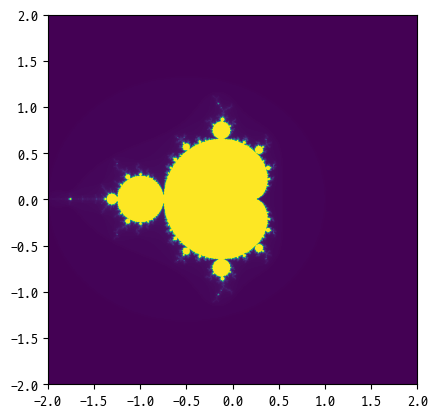

In [25]:
point = (-2, 2, -2, 2)
point_ = (-1.5, 1.5, -1.5, 1.5)
animate_mandelbrot_transition(point, point_)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from tkinter import *
from PIL import Image, ImageTk

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z * z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]), r1, r2)

def update(frame, point, point_, width, height, max_iter, step_size, im, ax):
    t = frame * step_size
    
    xmin = point[0] * (1 - t) + point_[0] * t
    xmax = point[1] * (1 - t) + point_[1] * t
    ymin = point[2] * (1 - t) + point_[2] * t
    ymax = point[3] * (1 - t) + point_[3] * t
    
    m_set, r1, r2 = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    im.set_array(m_set)
    im.set_extent((r1[0], r1[-1], r2[0], r2[-1]))

    ax.draw_artist(ax)

    canvas = FigureCanvas(ax.figure)
    canvas.draw()

    return ImageTk.PhotoImage(image=Image.frombytes('RGBA', (width, height), canvas.buffer_rgba()))

def animate_mandelbrot_transition(point, point_, width=800, height=800, max_iter=256, steps=30):
    fig, ax = plt.subplots(figsize=(width / 80, height / 80), dpi=80)  # dpi에 맞게 figsize 변경
    step_size = 1 / steps
    
    init_set, r1, r2 = mandelbrot_set(point[0], point[1], point[2], point[3], width, height, max_iter)
    im = ax.imshow(init_set, extent=(r1[0], r1[-1], r2[0], r2[-1]))

    def update_frame(frame):
        img = update(frame, point, point_, width, height, max_iter, step_size, im, ax)
        label.config(image=img)
        label.image = img  # Keep a reference to the image to prevent it from being garbage collected.
        root.update_idletasks()

    root = Tk()
    label = Label(root)
    label.pack()

    for frame in range(steps + 1):
        update_frame(frame)
        root.after(100)  # 시간 처리를 원할하게 하려면 이 값을 증가시켜주세요.

    root.mainloop()

TclError: image "pyimage1" doesn't exist

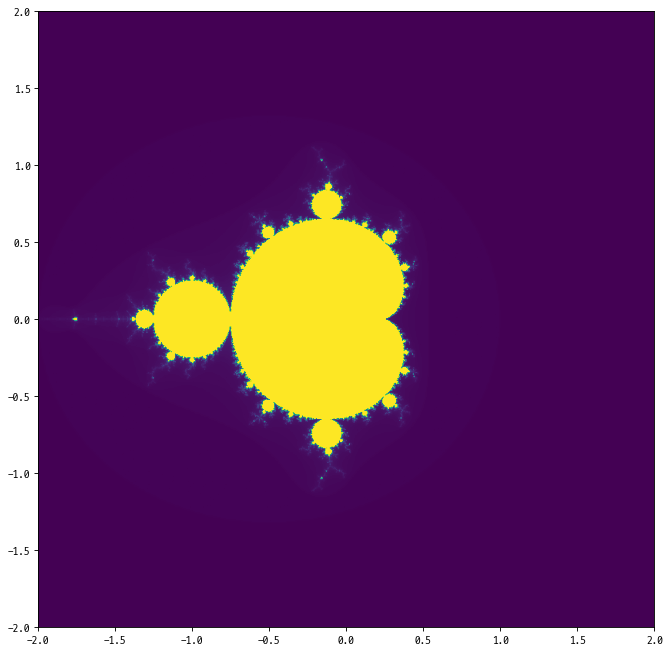

In [27]:
point = (-2, 2, -2, 2)
point_ = (-1.5, 1.5, -1.5, 1.5)
animate_mandelbrot_transition(point, point_)


In [30]:
# %%writefile mandelbrot.py
import tkinter as tk
import numpy as np
from PIL import Image, ImageTk

class MandelbrotSet(tk.Tk):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.canvas = tk.Canvas(self, width=400, height=400)
        self.canvas.pack()
        self.canvas.bind("<Button-1>", self.on_click)
        self.zoom_ratio = 1
        self.center_point = (-0.5, 0)
        self.draw_mandelbrot()

    def on_click(self, event):
        x, y = event.x, event.y
        dx = (x - 200) / 200
        dy = (y - 200) / 200
        new_center_x = self.center_point[0] + self.zoom_ratio * dx
        new_center_y = self.center_point[1] - self.zoom_ratio * dy
        self.zoom_ratio *= 0.5
        self.center_point = (new_center_x, new_center_y)
        self.draw_mandelbrot()

    def draw_mandelbrot(self):
        width, height = 400, 400
        iterations = 300
        mandelbrot_array = np.zeros((width, height))

        for w in range(width):
            for h in range(height):
                real = self.center_point[0] - self.zoom_ratio + self.zoom_ratio * 2 * w / width
                imag = self.center_point[1] - self.zoom_ratio + self.zoom_ratio * 2 * h / height
                c = complex(real, imag)
                z = complex(0, 0)
                in_set = 1

                for i in range(iterations):
                    z = z * z + c
                    if abs(z) > 2:
                        in_set = 0
                        break

                mandelbrot_array[h, w] = in_set

        img = Image.fromarray(np.uint8(mandelbrot_array * 255), "L")
        img = ImageTk.PhotoImage(img)
        self.canvas.create_image(0, 0, image=img, anchor="nw")
        self.canvas.image = img

if __name__ == "__main__":
    app = MandelbrotSet()
    app.mainloop()

Writing mandelbrot.py


In [31]:
!python mandelbrot.py

^C


In [32]:
from test_color.color_list import rand_hex_list_hsv

In [33]:
colors = rand_hex_list_hsv(3)
colors

['#ff8080', '#80ff80', '#8080ff']

In [ ]:
def newton_fractal(point = (0,0), depth = 10, n = 3):
    pass

In [35]:
def newton_fractal(point=(0, 0), depth=10, colors=['#ff8080', '#80ff80', '#8080ff']):
    x, y = point
    z = complex(x, y)
    
    # Newton-Raphson iteration
    for _ in range(depth):
        z = z - (z**3 - 1) / (3 * z**2)

    # Coloring based on the nearest root
    roots = [1, complex(-0.5, 0.5 * (3**0.5)), complex(-0.5, -0.5 * (3**0.5))]
    nearest_root = min(roots, key=lambda r: abs(z - r))
    index = roots.index(nearest_root)
    color = colors[index]
    
    return color

# Example usage:
point = (1, 1)
depth = 10
colors = ['#ff8080', '#80ff80', '#8080ff']
result_color = newton_fractal(point, depth, colors)
print("The color for the given point is:", result_color)


The color for the given point is: #ff8080


In [ ]:
def newton_fractal_viz(func, depth = 10, n = 3, colors=['#ff8080', '#80ff80', '#8080ff']):
    pass

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def newton_fractal_visualization(func, func_deriv, image_size=(800, 800), max_iter=20, xmin=-2, xmax=2, ymin=-2, ymax=2):
    width, height = image_size
    img = np.zeros((width, height))

    for y in range(height):
        for x in range(width):
            zx, zy = x * (xmax - xmin) / (width - 1) + xmin, y * (ymax - ymin) / (height - 1) + ymin
            c = zx + zy * 1j
            z = c
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z - func(z) / func_deriv(z)
            img[y, x] = i

    plt.imshow(img, cmap="hot", extent=(xmin, xmax, ymin, ymax))
    plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def newton_fractal_to_img(func, func_deriv, image_size=(800, 800), max_iter=20, xmin=-2, xmax=2, ymin=-2, ymax=2):
    width, height = image_size
    img = np.zeros((width, height))

    for y in range(height):
        for x in range(width):
            zx, zy = x * (xmax - xmin) / (width - 1) + xmin, y * (ymax - ymin) / (height - 1) + ymin
            c = zx + zy * 1j
            z = c
            for i in range(max_iter):
                if abs(z) > 2.0:
                    break 
                z = z - func(z) / func_deriv(z)
            img[y, x] = i
    return img

In [40]:
import sympy as sp

def differentiate_lambda_expression(lambda_expr):
    x = sp.Symbol('x')
    # 입력된 람다식에 x를 적용합니다.
    func = lambda_expr(x)
    # 함수의 도함수를 구합니다.
    func_deriv = sp.diff(func, x)
    # 도함수의 람다식을 반환합니다.
    deriv_lambda = sp.lambdify(x, func_deriv, 'numpy')
    return deriv_lambda

# Example usage
# 원래의 람다함수 예시
f1 = lambda x: x**3 - 1

# 도함수의 람다함수 반환
f1_deriv_lambda = differentiate_lambda_expression(f1)

# Test the returned lambda function
x_test = 2
print(f"f1_deriv_lambda at x={x_test}: {f1_deriv_lambda(x_test)}")

f1_deriv_lambda at x=2: 12


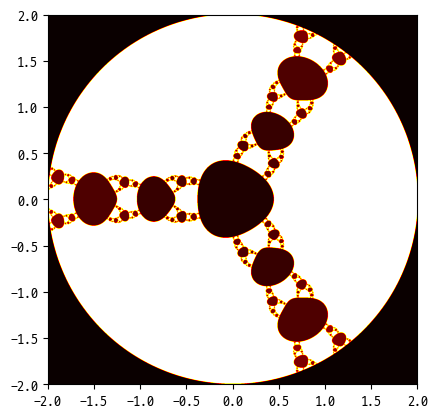

In [48]:
# Example usage
# 입력하실 람다식을 원하는 대로 변경해 주세요.
# f = lambda z: z**3 - 1
# f_deriv = lambda z: 3 * z**2 # Derivative of f

f = lambda z: z**3 - 1
f_deriv = differentiate_lambda_expression(f)
newton_fractal_visualization(f, f_deriv, max_iter=30, image_size=(2000,2000))

In [78]:
import numpy as np
import matplotlib.cm as cm

def colorize(img, cmap = 'hot'):
    # 컬러맵을 가져옵니다.
    colormap = cm.get_cmap(cmap)
    # 이미지에 컬러맵을 적용하고, (h, w, 3) 형태의 이미지를 반환합니다.
    return colormap(img)[..., :3]

# Example usage
h, w = 800, 800
img = np.random.rand(h, w)
cmap = 'viridis'
colored_img = colorize(img, cmap)

print(colored_img.shape)  # (h, w, 3) 확인


(800, 800, 3)


C:\Users\hyenz\AppData\Local\Temp\ipykernel_8480\2309179336.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


In [92]:
img = newton_fractal_to_img(f, f_deriv, max_iter=40, image_size=(800,800))

In [93]:
np.unique(img, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 39.]),
 array([138696,  21306,  18248,  27068,   4042,   6164,   2524,    902,
           632,    290,    102,     66,     26,     12,     12,      6,
             2,      4, 419898], dtype=int64))

In [81]:
color_img = colorize(img, cmap='hot')

C:\Users\hyenz\AppData\Local\Temp\ipykernel_8480\2309179336.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


In [61]:
# img를 png 파일로 저장
from PIL import Image
Image.fromarray(np.uint8(color_img * 255)).save('newton_fractal.png')

ValueError: Too many dimensions: 3 > 2.

In [60]:
# img에 새로운 색상 적용
from PIL import Image
img = img.convert('RGB')
img = np.array(img)
img.shape

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [105]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1

def df(x):
    return 3 * x**2

def hex_to_rgb_float(hex_color):
    # 16진수 컬러코드를 RGB로 변환합니다.
    hex_color = hex_color.lstrip('#')
    h_len = len(hex_color)
    return tuple(int(hex_color[i:i+h_len//3], 16) / 255 for i in range(0, h_len, h_len//3))

def newton_fractal(width=800, height=800, xlim=(-2, 2), ylim=(-2, 2), max_iter=20, colors = ['#ff0000', '#00ff00', '#0000ff']):
    image = np.zeros((height, width, 3))
    roots = [1, np.exp(1j * 2 * np.pi / 3), np.exp(1j * 4 * np.pi / 3)]

    for y in range(height):
        for x in range(width):
            zx, zy = x * (xlim[1] - xlim[0]) / (width - 1) + xlim[0], y * (ylim[1] - ylim[0]) / (height - 1) + ylim[0]
            c = zx + zy * 1j
            z = c

            for i in range(max_iter):
                if abs(z) > 2.0:
                    break
                z = z - f(z) / df(z)

            root_diffs = [abs(z - root) for root in roots]
            min_diff_index = np.argmin(root_diffs)
            
            
            # 근에 따라 색상을 지정합니다.
            if min_diff_index == 0:
                image[y, x] = hex_to_rgb_float(colors[0])  # Red
            elif min_diff_index == 1:
                image[y, x] = hex_to_rgb_float(colors[1])  # Green
            else:
                image[y, x] = hex_to_rgb_float(colors[2])  # Blue

    return image

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1

def df(x):
    return 3 * x**2

def hex_to_rgb_float(hex_color):
    # 16진수 컬러코드를 RGB로 변환합니다.
    hex_color = hex_color.lstrip('#')
    h_len = len(hex_color)
    return tuple(int(hex_color[i:i+h_len//3], 16) / 255 for i in range(0, h_len, h_len//3))

def newton_fractal(width=800, height=800, xlim=(-2, 2), ylim=(-2, 2), max_iter=20, colors = ['#ff0000', '#00ff00', '#0000ff']):
    image = np.zeros((height, width, 3))
    roots = [1, np.exp(1j * 2 * np.pi / 3), np.exp(1j * 4 * np.pi / 3)]

    x_values = np.linspace(xlim[0], xlim[1], width)
    y_values = np.linspace(ylim[0], ylim[1], height)

    for y_idx, y_val in enumerate(y_values):
        for x_idx, x_val in enumerate(x_values):
            c = x_val + y_val * 1j
            z = c

            for i in range(max_iter):
                if abs(z) > 2.0:
                    break
                z = z - f(z) / df(z)

            root_diffs = [abs(z - root) for root in roots]
            min_diff_index = np.argmin(root_diffs)

            # 근에 따라 색상을 지정합니다.
            if min_diff_index == 0:
                image[y_idx, x_idx] = hex_to_rgb_float(colors[0])  # Red
            elif min_diff_index == 1:
                image[y_idx, x_idx] = hex_to_rgb_float(colors[0])  # Green
            else:
                image[y_idx, x_idx] = hex_to_rgb_float(colors[0])  # Blue

    return image

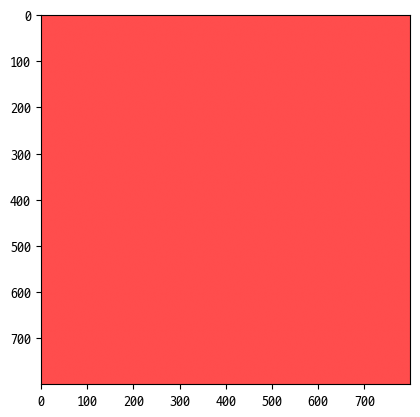

In [126]:
width, height = 800, 800
xlim, ylim = (-2, 2), (-2, 2)
max_iter = 10
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
image = newton_fractal(width, height, xlim, ylim, max_iter, colors)
plt.imshow(image)
plt.show()
from PIL import Image
file_name = f'newton_fractal_{width}x{height}_{max_iter}.png'
Image.fromarray(np.uint8(img * 255)).save(file_name)

In [101]:
hex_to_rgb_float('#ff8080')

(1.0, 0.5019607843137255, 0.5019607843137255)

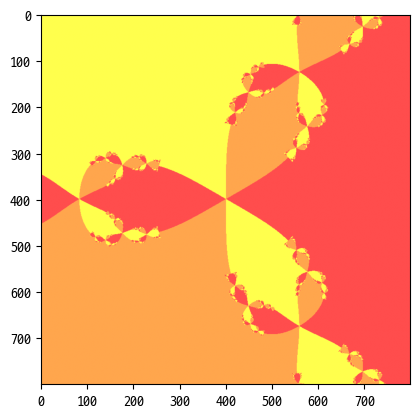

In [115]:
from test_color.color_list import rand_hex_list_hsv
width, height = 800, 800
xlim, ylim = (-1, 1), (-1, 1)
max_iter = 20
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
image = newton_fractal(width, height, xlim, ylim, max_iter, colors)
plt.imshow(image)
plt.show()

In [113]:
colors

['#ff4d4d', '#ffa64d', '#ffff4d']

In [116]:
# img를 png 파일로 저장
from PIL import Image
file_name = f'newton_fractal_{width}x{height}_{max_iter}.png'
Image.fromarray(np.uint8(image * 255)).save(file_name)

In [111]:
width, height = 4000, 4000
xlim, ylim = (-1, 1), (-1, 1)
max_iter = 50
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
img = newton_fractal(width, height, xlim, ylim, max_iter, colors)

file_name = f'newton_fractal_{width}x{height}_{max_iter}.png'
Image.fromarray(np.uint8(img * 255)).save(file_name)

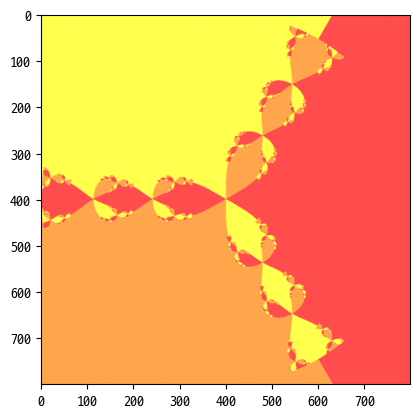

In [112]:
plt.imshow(image)
plt.show()

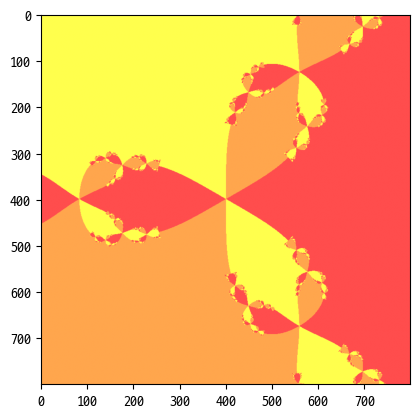

In [121]:
width, height = 800, 800
xlim, ylim = (-10, 10), (-10, 10)
max_iter = 20
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
img = newton_fractal(width, height, xlim, ylim, max_iter, colors)

file_name = f'newton_fractal_{width}x{height}_{max_iter}.png'
Image.fromarray(np.uint8(img * 255)).save(file_name)
plt.imshow(image)
plt.show()

In [140]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 1

def df(x):
    return 3 * x**2

def hex_to_rgb_255(hex_code):
    # 16진수 컬러코드를 RGB로 변환합니다.
    hex_code = hex_code.lstrip('#')
    h_len = len(hex_code)
    return tuple(int(hex_code[i:i+h_len//3], 16) for i in range(0, h_len, h_len//3))

def newton_fractal(width = 800, height = 800, max_iter = 20, colors = None):
    if not colors:
        colors = ['#ff0000', '#00ff00', '#0000ff']
    # 화면 크기 및 범위 설정
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2

    # 이미지 데이터 배열 초기화
    img = np.zeros((height, width, 3), dtype=np.uint8)

    # 뉴턴 메소드 수행
    for y in range(height):
        for x in range(width):
            zx, zy = x * (x_max - x_min) / (width - 1) + x_min, y * (y_max - y_min) / (height - 1) + y_min
            c = zx + zy * 1j # 복소수로 변환
            z = c

            for i in range(max_iter):
                if abs(z) >= 2.0:
                    break 
                z = z - (z**3 - 1) / (3 * z**2) # f(z) / f'(z) 뺌
                if abs(z**3 - 1) < 1e-6:
                    break
            else:
                img[y, x] = (0, 0, 0)

            # 각 근에 따른 픽셀 색상 설정
            if i < max_iter - 1:
                if abs(z - 1) < 0.01:
                    img[y, x] = hex_to_rgb_255(colors[0]) # red
                elif abs(z + 0.5 + 0.5j * np.sqrt(3)) < 0.01:
                    img[y, x] = hex_to_rgb_255(colors[1]) # green
                elif abs(z + 0.5 - 0.5j * np.sqrt(3)) < 0.01:
                    img[y, x] = hex_to_rgb_255(colors[2]) # blue
    return img

In [129]:
hex_to_rgb_255('#ff0000')

(255, 0, 0)

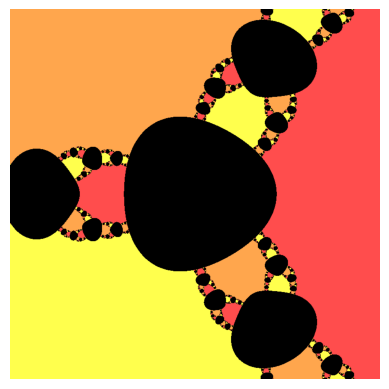

In [137]:
# Example usage:
width = 800
height = 800
max_iter = 40
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
image = newton_fractal(width, height, max_iter, colors)
plt.imshow(image)
plt.axis('off')
plt.show()

In [143]:
iters = [1,5,10,20,30,40,50]
width = 2000
height = 2000
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
for i in iters:
    image = newton_fractal(width, height, i, colors)
    file_name = f'newton_fractal_{width}x{height}_{i}.png'
    Image.fromarray(np.uint8(image * 255)).save(file_name)

In [142]:
colors = rand_hex_list_hsv(12, s=.7, v=1.)
colors = colors[:3]
for c in colors:
    print(hex_to_rgb_255(c))

(255, 77, 77)
(255, 166, 77)
(255, 255, 77)


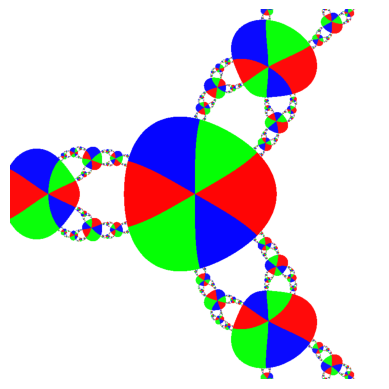

In [139]:
import numpy as np
import matplotlib.pyplot as plt

def newton_fractal2(width, height, max_iter):
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1

    img = np.zeros((height, width, 3), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            zx, zy = x * (x_max - x_min) / (width - 1) + x_min, y * (y_max - y_min) / (height - 1) + y_min
            c = zx + zy * 1j
            z = c
            roots = [1, -0.5 + 0.5j * np.sqrt(3), -0.5 - 0.5j * np.sqrt(3)]

            for i in range(max_iter):
                if abs(z) >= 2.0:
                    break
                z = z - (z**3 - 1) / (3 * z**2)
                root_diffs = [abs(z - root) for root in roots]
                min_diff_index = np.argmin(root_diffs)

            # 픽셀 색상을 수렴 속도에 따라 다르게 설정
            color_scaling_factor = int(255 * (i / (max_iter - 1)))
            if min_diff_index == 0:
                img[y, x] = (255, color_scaling_factor, color_scaling_factor)  # Red
            elif min_diff_index == 1:
                img[y, x] = (color_scaling_factor, 255, color_scaling_factor)  # Green
            elif min_diff_index == 2:
                img[y, x] = (color_scaling_factor, color_scaling_factor, 255)  # Blue

    return img

img = newton_fractal2(800, 800, 50) 
plt.imshow(img)
plt.axis('off')
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def newton_fractal(width, height, max_iter):
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1

    img = np.zeros((height, width, 3), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            zx, zy = x * (x_max - x_min) / (width - 1) + x_min, y * (y_max - y_min) / (height - 1) + y_min
            c = zx + zy * 1j # Convert to complex number
            z = c
            roots = [1, -0.5 + 0.5j * np.sqrt(3), -0.5 - 0.5j * np.sqrt(3)]

            for i in range(max_iter):
                if abs(z) >= 2.0:
                    break
                z = z - (z**3 - 1) / (3 * z**2)
    
            # Assign pixel colors based on the closest root
            root_diffs = [abs(z - root) for root in roots]
            min_diff_index = np.argmin(root_diffs)

            if min_diff_index == 0:
                img[y, x] = (255, 0, 0)  # Red
            elif min_diff_index == 1:
                img[y, x] = (0, 255, 0)  # Green
            elif min_diff_index == 2:
                img[y, x] = (0, 0, 255)  # Blue

    return img


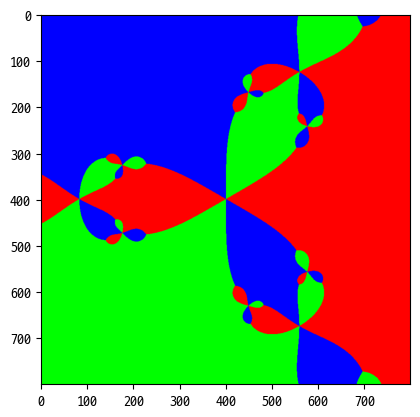

In [6]:
img = newton_fractal(800, 800, 3) 
plt.imshow(img)
plt.show()

In [17]:
# % ======================================================================
# % John Gennari
# % 3/13/90
# %
# % This is Dr. Detrano's database modified to be a real MIXED dataset.
# %
# % Attributes: 8 symbolic, 6 numeric.
# %  Age; sex; chest pain type (angina, abnang, notang, asympt)
# %  Trestbps (resting blood pres); cholesteral; fasting blood sugar < 120
# %  (true or false); resting ecg (norm, abn, hyper); max heart rate; 
# %  exercise induced angina (true or false); oldpeak; slope (up, flat, down)
# %  number of vessels colored (???); thal (norm, fixed, rever). Finally, the
# %  class is either healthy (buff) or with heart-disease (sick).
# %
# % Original atts: 
# %   age; sex (1,0); cp (1-4); trestbps; chol; fbs (1,0); restecg (0,1,2); 
# %   thalach; exang (1,0); oldpeak; slope (1,2,3); ca; thal (3,6,7);
# %   class att: 0 is healthy, 1,2,3,4 is sick.
# % ======================================================================

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class', 'class_num']
continues_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
target_col_1 = ['class']
target_col_2 = ['class_num']

In [18]:
import pandas as pd
cleve = pd.read_csv(r'./data/cleve.mod', sep='\s+', header=None, names=cols, na_values='?', index_col=False)

In [19]:
cleve.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class_num
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H


In [23]:
cleve[categorical_cols].head()

,sex,cp,fbs,restecg,exang,slope,thal
0,male,angina,true,hyp,fal,down,fix
1,male,asympt,fal,hyp,true,flat,norm
2,male,asympt,fal,hyp,true,flat,rev
3,male,notang,fal,norm,fal,down,norm
4,fem,abnang,fal,hyp,fal,up,norm


In [24]:
cleve[continues_cols].head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63.0,145.0,233.0,150.0,2.3,0.0
1,67.0,160.0,286.0,108.0,1.5,3.0
2,67.0,120.0,229.0,129.0,2.6,2.0
3,37.0,130.0,250.0,187.0,3.5,0.0
4,41.0,130.0,204.0,172.0,1.4,0.0


In [25]:
cleve[target_col_1 + target_col_2].head()

,class,class_num
0,buff,H
1,sick,S2
2,sick,S1
3,buff,H
4,buff,H


In [34]:
cleve[target_col_1].value_counts(), cleve[target_col_2].value_counts()

(class
 buff     165
 sick     138
 Name: count, dtype: int64,
 class_num
 H            165
 S1            54
 S2            36
 S3            35
 S4            13
 Name: count, dtype: int64)